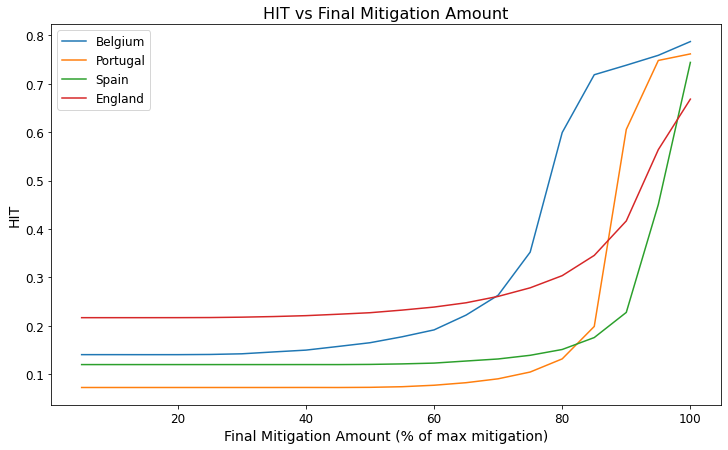

In [1]:
import matplotlib.pyplot as plt
import numpy as np

p=["b","p","s","e"]
dictc = {
    "b": "Belgium",
    "p": "Portugal",
    "s": "Spain",
    "e": "England"
}
lags={"b": 1, "p": 3, "s": 8,"e": 29}
hits=[[]]
hitsci1=[[]]
hitsci2=[[]]
logls = [[]]
for country in p:
    paths=[]
    for i in range(20):
        paths.append(country+"_"+str((i+1)*5)+".o")
    data=[[]]
    dataci1=[[]]
    dataci2=[[]]
    for x in paths:
        q=[]
        ci1=[]
        ci2=[]
        with open(x, 'r') as f:
            for line in f:
                if 'LogL: ' in line:
                    q.append(line[13:23])
                if 'p:' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'R0_1' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'CV_1:' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'lag_1:' in line:
                    q.append(lags[country])
        data.append(q)
        dataci1.append(ci1)
        dataci2.append(ci2)
    data.pop(0)
    dataci1.pop(0)
    dataci2.pop(0)

    logl=[]
    hit=[]
    hitci1=[]
    hitci2=[]
    for d in data:
        hit.append(1-(1/float(d[2]))**(1/(1+(float(d[3])**2))))
#     for e in dataci1:
#         hitci1.append(1-(1/float(e[1]))**(1/(1+(float(e[2])**2))))
#     for f in dataci2:
#         hitci2.append(1-(1/float(f[1]))**(1/(1+(float(f[2])**2))))
    hits.append(hit)
#     hitsci1.append(hitci1)
#     hitsci2.append(hitci2)
#     tspan=[]
#     for i in range(20):
#         tspan.append((i+1)*5)
#     for d in data:
#         logl.append(float(d[0]))
#     logls.append(logl)
#     f = list(map(list, zip(*data)))
#     df = pd.DataFrame()
#     df["Num Days at Max Social Distancing"] = tspan
#     df["Log likelihood"] = f[0]
#     df["dmax"] = f[1]
#     df["R0"] = f[2]
#     df["CV"] = f[3]
#     df["lag"] = f[4]
#     df.to_csv(r"C:\Users\pppot\Documents\projects\PEfinalSD\results\\"  + dictc[country] + "_Estimated_Parameters" + ".csv", index=False)
logls.pop(0)
hits.pop(0)
hitsci1.pop(0)
hitsci2.pop(0)
tspan=[]
for i in range(20):
    tspan.append((i+1)*5)
plt.figure(figsize=(12,7))
h1,=plt.plot(tspan,hits[0], label = "Belgium")
h2,=plt.plot(tspan,hits[1], label = "Portugal")
h3,=plt.plot(tspan,hits[2], label = "Spain")
h4,=plt.plot(tspan,hits[3], label = "England")
# plt.plot(tspan,hitsci1[0], color= "whitesmoke")
# plt.plot(tspan,hitsci1[1], color= "whitesmoke")
# plt.plot(tspan,hitsci1[2], color= "whitesmoke")
# plt.plot(tspan,hitsci1[3], color= "whitesmoke")
# plt.plot(tspan,hitsci2[0], color= "whitesmoke")
# plt.plot(tspan,hitsci2[1], color= "whitesmoke")
# plt.plot(tspan,hitsci2[2], color= "whitesmoke")
# plt.plot(tspan,hitsci2[3], color= "whitesmoke")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Final Mitigation Amount (% of max mitigation)', fontsize=14)
plt.ylabel('HIT', fontsize=14)
plt.legend([h1,h2,h3,h4], ["Belgium","Portugal","Spain","England"], fontsize=12)
plt.title("HIT vs Final Mitigation Amount", fontsize = 16)
plt.show()

In [2]:
print(data)

[['1.8070e+06', '0.5284', '3.1591', '1.9236', 29], ['1.8070e+06', '0.5284', '3.1591', '1.9236', 29], ['1.8070e+06', '0.5285', '3.1599', '1.9238', 29], ['1.8070e+06', '0.5285', '3.1596', '1.9234', 29], ['1.8070e+06', '0.5284', '3.1539', '1.9201', 29], ['1.8069e+06', '0.5280', '3.1356', '1.9090', 29], ['1.8068e+06', '0.5278', '3.1135', '1.8934', 29], ['1.8065e+06', '0.5286', '3.0985', '1.8768', 29], ['1.8062e+06', '0.5293', '3.0564', '1.8444', 29], ['1.8058e+06', '0.5322', '3.0418', '1.8203', 29], ['1.8052e+06', '0.5361', '3.0096', '1.7775', 29], ['1.8046e+06', '0.5416', '2.9860', '1.7337', 29], ['1.8039e+06', '0.5491', '2.9629', '1.6774', 29], ['1.8032e+06', '0.5584', '2.9250', '1.5966', 29], ['1.8024e+06', '0.5715', '2.9090', '1.5062', 29], ['1.8017e+06', '0.5870', '2.8999', '1.3929', 29], ['1.8012e+06', '0.6055', '2.8819', '1.2233', 29], ['1.8010e+06', '0.6293', '2.8944', '0.9857', 29], ['1.8013e+06', '0.6550', '2.9065', '0.5347', 29], ['1.8018e+06', '0.6627', '3.0224', '0.0550', 29]]

In [3]:
# import numpy as np
# dict = {
#     "b": "Belgium",
#     "p": "Portugal",
#     "s": "Spain",
#     "e": "England"
# }
# import pandas as pd
# datespans = {
#     p[0]: pd.date_range(start="2020-03-01",end="2021-03-01"),
#     p[1]: pd.date_range(start="2020-03-03",end="2021-03-03"),
#     p[2]: pd.date_range(start="2020-02-12",end="2021-02-11"),
#     p[3]: pd.date_range(start="2020-01-31",end="2021-01-30")
# }
# for country in p:
#     d30 = np.genfromtxt(country+"_30.csv", delimiter = ',')
#     d60 = np.genfromtxt(country+"_60.csv", delimiter = ',')
#     d90 = np.genfromtxt(country+"_100.csv", delimiter = ',')
# #     dat = pd.DataFrame()
# #     dat["Date"] = datespans[country]
# #     dat["30 days at max social distancing"] = d30
# #     dat["60 days at max social distancing"] = d60
# #     dat["100 days at max social distancing"] = d90
# #     dat.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Epidemic_Curve.csv", index=False)
#     plt.figure(figsize=(12,7))
#     d1,=plt.plot(datespans[country],d30)
#     d2,=plt.plot(datespans[country],d60)
#     d3,=plt.plot(datespans[country],d90)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.xlabel('Days', fontsize=16)
#     plt.ylabel('Population (%)', fontsize=16)
#     plt.legend([d1,d2,d3], ["30 days", "60 days", "100 days"], fontsize=14)
#     plt.title(dict[country], fontsize = 16)
#     plt.show()

In [4]:
# import pandas as pd
# datespans = {
#     p[0]: pd.date_range(start="2020-03-01",end="2021-03-01"),
#     p[1]: pd.date_range(start="2020-03-03",end="2021-03-03"),
#     p[2]: pd.date_range(start="2020-02-12",end="2021-02-11"),
#     p[3]: pd.date_range(start="2020-01-31",end="2021-01-30")
# }

# for country in p:
#     d30Rc = np.genfromtxt(country+"_30_Rc.csv", delimiter = ',')
#     d60Rc = np.genfromtxt(country+"_60_Rc.csv", delimiter = ',')
#     d90Rc = np.genfromtxt(country+"_100_Rc.csv", delimiter = ',')
#     plt.figure(figsize=(12,7))
    
# #     dat = pd.DataFrame()
# #     dat["Date"] = datespans[country]
# #     dat["30 days at max social distancing"] = d30Rc
# #     dat["60 days at max social distancing"] = d60Rc
# #     dat["100 days at max social distancing"] = d90Rc
# #     dat.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Rc_Curve.csv", index=False)

    
    
#     r1,=plt.plot(datespans[country],d30Rc)
#     r2,=plt.plot(datespans[country],d60Rc)
#     r3,=plt.plot(datespans[country],d90Rc)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
    
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('Rc', fontsize=16)
#     plt.legend([r1,r2,r3], ["30 days Rc", "60 days Rc", "100 days Rc"], fontsize=14)
#     plt.title(dict[country], fontsize=16)
#     plt.show()

In [5]:
# import pandas as pd
# datespans = {
#     p[0]: pd.date_range(start="2020-03-01",end="2021-03-01"),
#     p[1]: pd.date_range(start="2020-03-03",end="2021-03-03"),
#     p[2]: pd.date_range(start="2020-02-12",end="2021-02-11"),
#     p[3]: pd.date_range(start="2020-01-31",end="2021-01-30")
# }

# for country in p:
#     d30Reff = np.genfromtxt(country+"_30_Reff.csv", delimiter = ',')
#     d60Reff = np.genfromtxt(country+"_60_Reff.csv", delimiter = ',')
#     d90Reff = np.genfromtxt(country+"_100_Reff.csv", delimiter = ',')
#     plt.figure(figsize=(12,7))

# #     dat = pd.DataFrame()
# #     dat["Date"] = datespans[country]
# #     dat["30 days at max social distancing"] = d30Reff
# #     dat["60 days at max social distancing"] = d60Reff
# #     dat["100 days at max social distancing"] = d90Reff
# #     dat.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Reff_Curve.csv", index=False)


#     r4,=plt.plot(datespans[country], d30Reff)
#     r5,=plt.plot(datespans[country], d60Reff)
#     r6,=plt.plot(datespans[country], d90Reff)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('Reff', fontsize=16)
#     plt.legend([r4,r5,r6], ["30 days Reff", "60 days Reff", "100 days Reff"], fontsize=14)
#     plt.title(dict[country], fontsize=16)
#     plt.show()